In [146]:
import pandas as pd
import seaborn as sns
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #size of plots

#Read in data

df = pd.read_csv(r'C:\Users\civic\Downloads\movies\movies.csv')
#df.head()

In [147]:
#check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [131]:
#Datatypes for each field
#df.dtypes

In [148]:
#Fill na's with 0
#Change some data types of fields
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)
df['released'] = df['released'].fillna("January 01, 1900, (Unknown Country)")

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
#df

In [149]:
#Create a year released column

#Convert released to string
df['relased'] = df['released'].astype(str)

#Split released to multiple fields
df[['released_date','released_year']]= df['released'].str.split(", ", 1, expand=True)
#Take only the year in released year
df['released_year'] = df['released_year'].astype(str).str[:4]

#df

In [150]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,relased,released_date,released_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,"December 18, 2009 (United States)",December 18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,"April 26, 2019 (United States)",April 26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,"December 19, 1997 (United States)",December 19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,"December 18, 2015 (United States)",December 18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,"April 27, 2018 (United States)",April 27,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,"January 26, 1990 (United States)",January 26,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,"April 14, 1989 (United States)",April 14,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,"April 7, 1989 (United States)",April 7,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,"January 13, 1990 (Japan)",January 13,1990


In [151]:
pd.set_option('display.max_rows', 60)

In [152]:
#Find/Drop Duplicates

# df['company'] = df['company'].drop_duplicates() #To Really drop duplicates
#df['company'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,relased,released_date,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980 (United States)",June 13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980 (United States)",July 2,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980 (United States)",June 20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980 (United States)",July 2,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980 (United States)",July 25,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,"October 23, 2020 (United States)",October 23,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,"February 7, 2020 (United States)",February 7,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,"April 27, 2020 (Cameroon)",April 27,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,"October 1, 2020 (United States)",October 1,2020


In [101]:
#Budget correlation
#Company correlation


<function matplotlib.pyplot.show(close=None, block=None)>

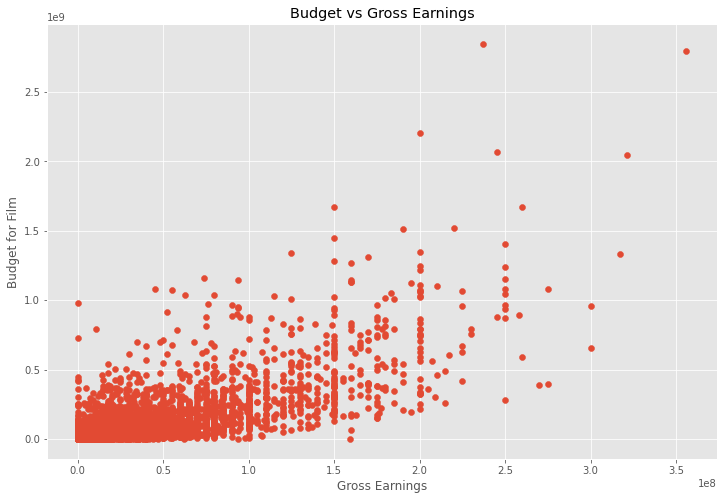

In [153]:
#Scatter plot of budget & gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

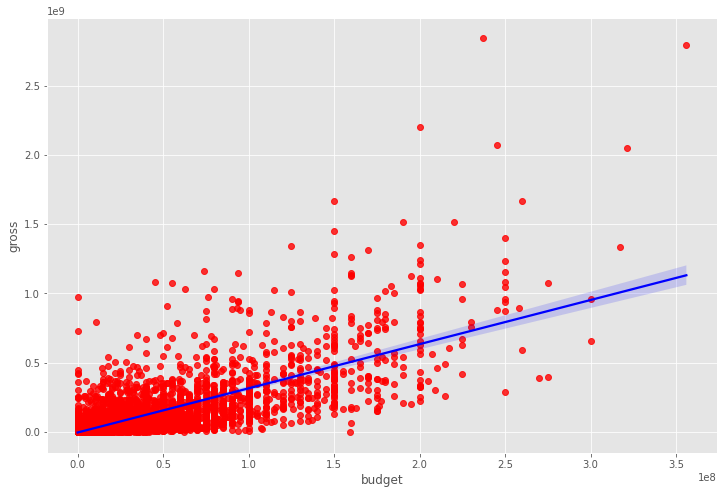

In [154]:
#Plot budget vs gross with seaborn
sns.regplot(x=df['budget'], y=df['gross'], data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [155]:
#Correlation Matrix
#df.corr()

df.corr(method='pearson') #choose pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


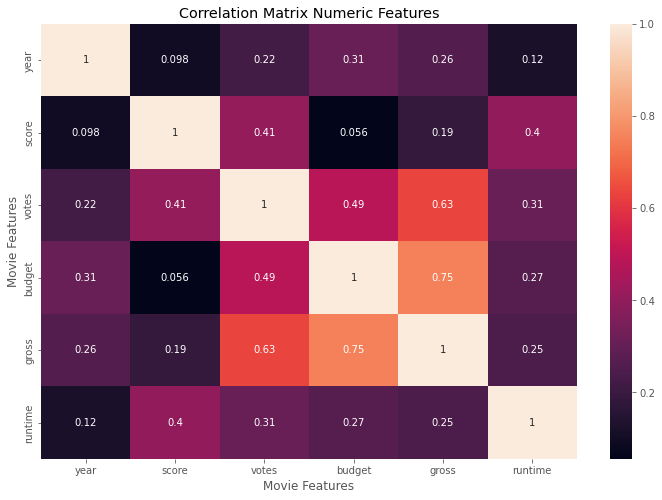

In [156]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [159]:
#Observe Company correlations
df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
#df_numerized

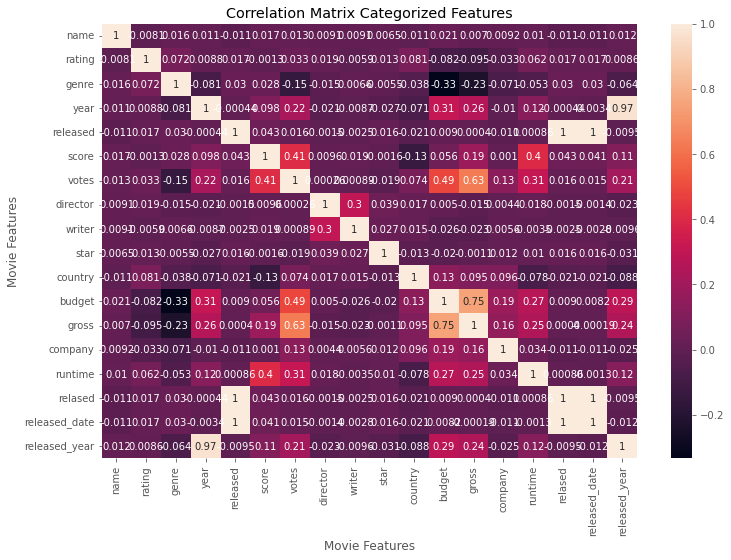

In [160]:
#Categorized correlations
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Categorized Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [161]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
corr_pairs

name           name             1.000000
               rating          -0.008069
               genre            0.016355
               year             0.011453
               released        -0.011041
                                  ...   
released_year  company         -0.024541
               runtime          0.115317
               relased         -0.009476
               released_date   -0.012375
               released_year    1.000000
Length: 324, dtype: float64

In [162]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre          budget          -0.334021
budget         genre           -0.334021
genre          gross           -0.234297
gross          genre           -0.234297
genre          votes           -0.145307
                                  ...   
company        company          1.000000
runtime        runtime          1.000000
relased        released         1.000000
writer         writer           1.000000
released_year  released_year    1.000000
Length: 324, dtype: float64

In [163]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross          votes            0.632834
votes          gross            0.632834
budget         gross            0.750157
gross          budget           0.750157
year           released_year    0.966577
released_year  year             0.966577
released_date  released         0.999746
relased        released_date    0.999746
released       released_date    0.999746
released_date  relased          0.999746
name           name             1.000000
relased        relased          1.000000
rating         rating           1.000000
genre          genre            1.000000
year           year             1.000000
released       released         1.000000
               relased          1.000000
score          score            1.000000
votes          votes            1.000000
released_date  released_date    1.000000
director       director         1.000000
star           star             1.000000
country        country          1.000000
budget         budget           1.000000
gross          g

In [ ]:
#This showed that votes have high correlation to gross earnings
#Company has low correlation to gross earnings